### Linear Regression with multiple variables
> This is the second part of the Assignment 1 of Stanford Machine Learning course by Andrew Ng (the first part was on univaliable linear regression). The purpose of the problem is to predict a good market price for a house given its parameters. 
The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in sqft), the second column is the number of bedrooms, and the third column is the selling price.

#### Workspace setup and basic exploration

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ex1data2.txt', header = None)

In [3]:
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [4]:
data.describe()

,0,1,2
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [5]:
#defining the variables 
X = data.iloc[:,0:2]
y = data.iloc[:,2]
m = len(y)

#### Feature normalization

> The basic data exploration above revealed that the size and number of bedroom features of the house significantly differ in terms of scales. This leads to much slower convergence of the gradient descent, but can be solved by feature normalization -- substracting the variable by its mean, then deviding by its standard deviation.       

In [6]:
X = (X-np.mean(X))/np.std(X)

#### Initializing the parameters of the model 
> This part is similar to what was done for one variable linear regression model   

In [7]:
ones = np.ones((m,1)) #the intercept
X = np.hstack((ones, X))
theta = np.zeros((3,1))
y = y[:,np.newaxis]

In [8]:
np.shape(X)

(47, 3)

In [9]:
theta

array([[0.],
       [0.],
       [0.]])

In [10]:
alpha = 0.001 #learning rate (or step size)
iterations = 10000

#### Cost and gradient descent functions 
> Defining the cost and gradient descent functions to find the optimal values of theta which minimize the cost   

In [11]:
# Cost function
def computeCost(X, y, theta):
    err = np.dot(X, theta)-y
    return 1/(2*m)*np.sum(err**2)

J = computeCost(X, y, theta)
print(J)

65591548106.45744


In [12]:
# Gradient descent function
def gradientDescent(X, y, theta, alpha, iterations):
    for i in range(iterations):
        err = np.dot(X, theta)-y
        err = np.dot(X.T, err)
        theta = theta-(alpha/m)*err
        if i%1000 == 0: 
            J = computeCost(X, y, theta)
            print(J)
    return theta

theta = gradientDescent(X, y, theta, alpha, iterations)
print(theta)

65461556490.59011
10655961048.012808
3362671956.868922
2292041412.401633
2106366993.1985693
2064035306.7723598
2051156465.4287784
2046447495.3263445
2044580167.302952
2043817372.841038
[[340397.28199562]
 [108736.46443478]
 [ -5867.03988583]]


> Above we can see how the cost has decreased with the number of iterations and eventually reached its (local) minimum at 2043817372.841038. At this point the parameters of theta are [[340397.28199562], [108736.46443478], [-5867.03988583].

2043502620.9880803
2043372312.084585
2043318304.7094285
2043295913.0362937
2043286628.281986
2043282778.1934266
2043281181.6660123
2043280519.6266847
2043280245.0954483
2043280131.2541263


Text(0.5, 1.0, 'Cost function using Gradient Descent')

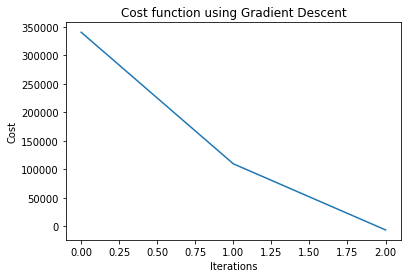

In [15]:
J_plot = gradientDescent(X, y, theta, alpha, iterations)
plt.plot(J_plot)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost function using Gradient Descent")